# NASA Polynomials Conversion with import functions

In [1]:
import input_generator as ig
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
compositions = {'ch3x':{'H':3, 'C':1, 'N':0, 'O':0, 'Ag':1}}

traj_ps = [['relax_restart.traj', 'zpe_log.txt', 'ads60.traj'],]
output_p = "recalc_dft_sp"

In [3]:
ig.input_generation(compositions, traj_ps, output_p, ocp=False)

-22.86715245
The heat of formation at 0 K for ch3x is 35.757928180978205 kJ/mol


successfully parsed file ch3x.dat
switching to 2D-gas for 2 lowest modes for ch3x
46.52419965747032
46.52419965747032


/home/ssun30/Work/Electrocat/DFT/Ag111_CH3/input_generator.py:330: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(min(molecule.H - molecule.heat_of_formation_298K)*0.9, max(molecule.H - molecule.heat_of_formation_298K)*1.025)


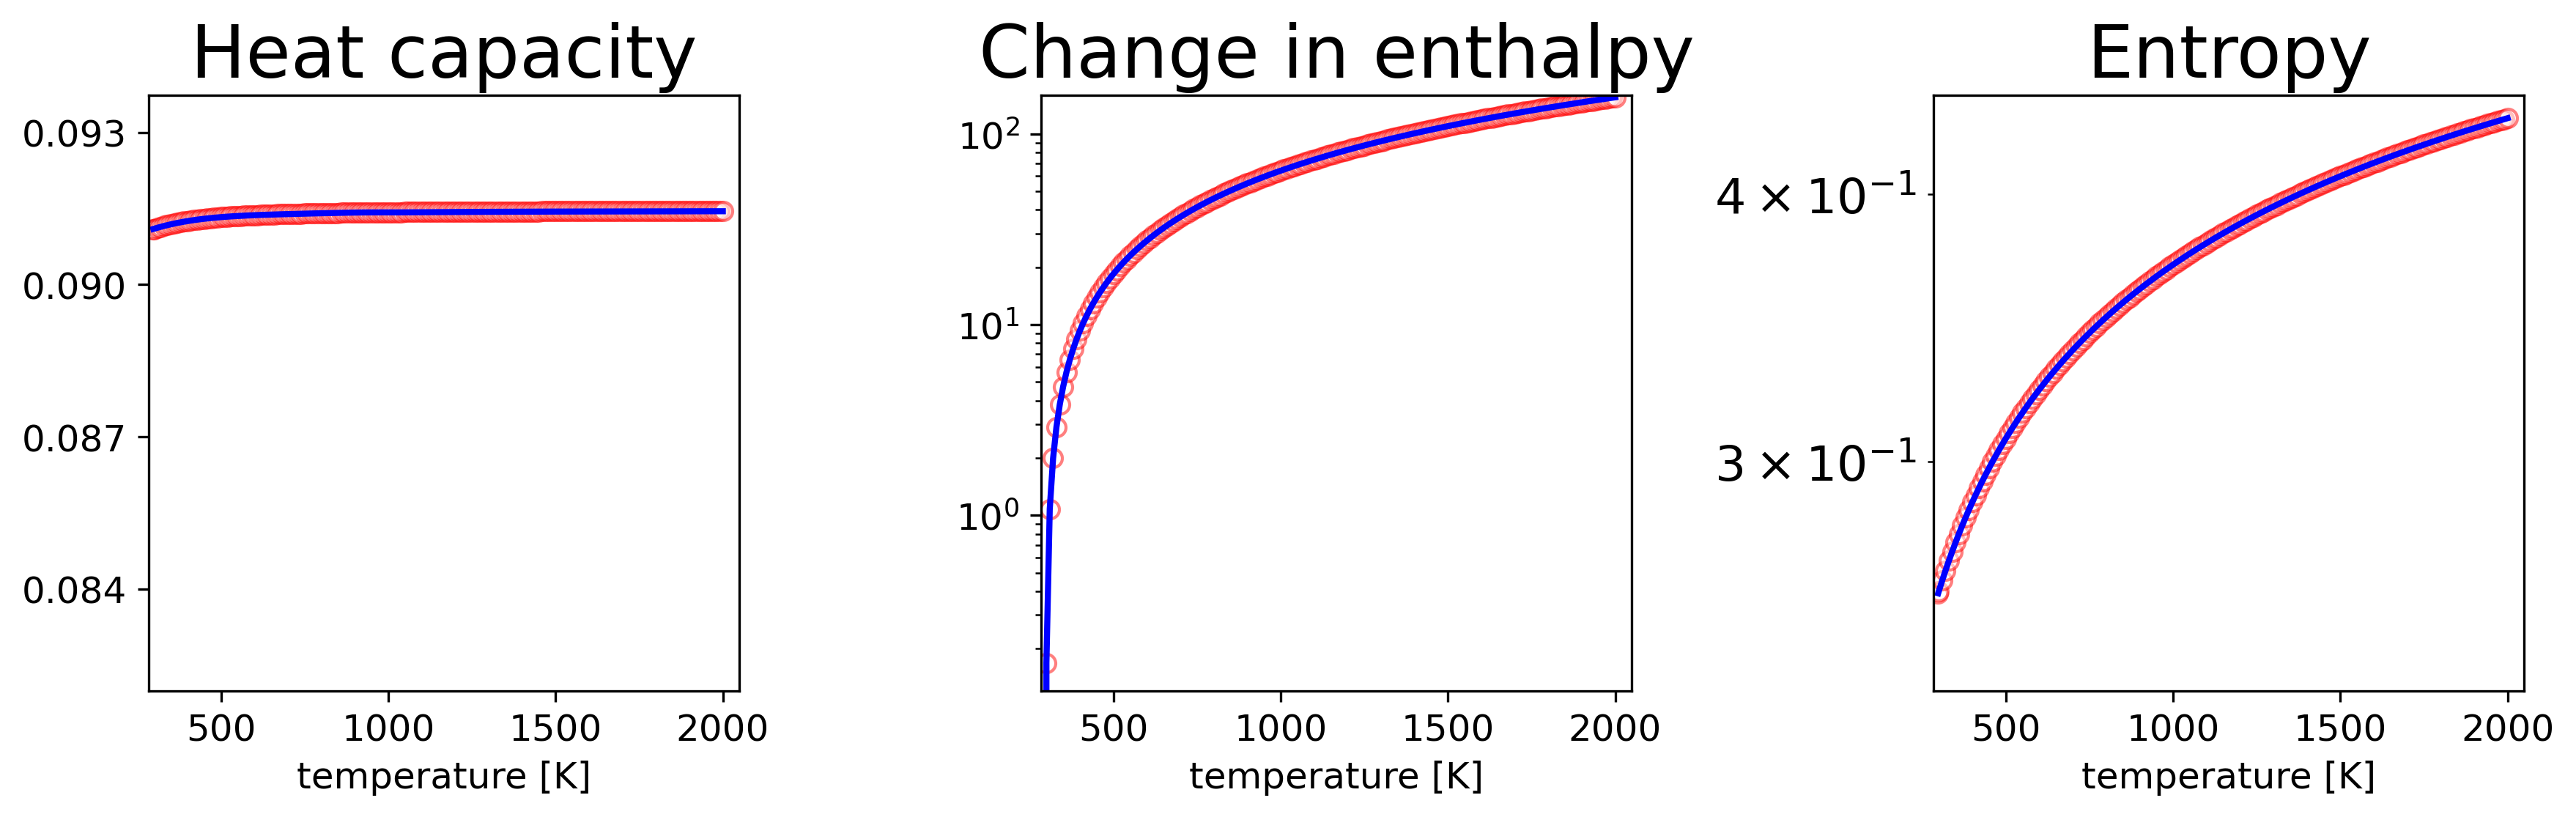

In [4]:
# create the array of temperatures in 10 degree increments
temperature = [298.15] #NOTE 298.15 must be first for the NASA polynomial routine to work!
T_low = 300.0
T_high = 2000.0
dT = 10.0 #temperature increment
temperature = np.append(temperature, np.arange(T_low, T_high+dT, dT))

list_of_species = 'sp_list.dat'
element = 'recalc_dft_sp' #varies
info = open(list_of_species,'r')
species_list = info.readlines()
info.close()

new_output = open('dft_recalc.txt', 'w')

name_line = '\n'
species_line = '\n'

counter = -1
for species in species_list:
    counter += 1
    filename = species.strip()
    test = ig.Molecule()
    ig.parse_input_file(filename, test, element)
    ig.thermo(test, temperature)

    name_line += ' %s'%(test.name)
    if counter == 4:
        name_line +='\n'
        counter == -1
    species_line += test.species_lines

    ig.get_thermo_from_NASA(temperature, test)
    ig.compare_NASA_to_thermo(temperature, test)

name_line += '\n\n'
new_output.write(name_line)
new_output.write(species_line)

new_output.close()